In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
features = pd.DataFrame(boston.data,columns = boston.feature_names)
target = pd.DataFrame(boston.target,columns=["MEDV"])

In [ ]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


As you can see,none of the features have null values and we also have no categorical columns



In [ ]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


But the features have different scale(eg.max of tax is 711 whereas max of chas is 1

Lets do some EDA

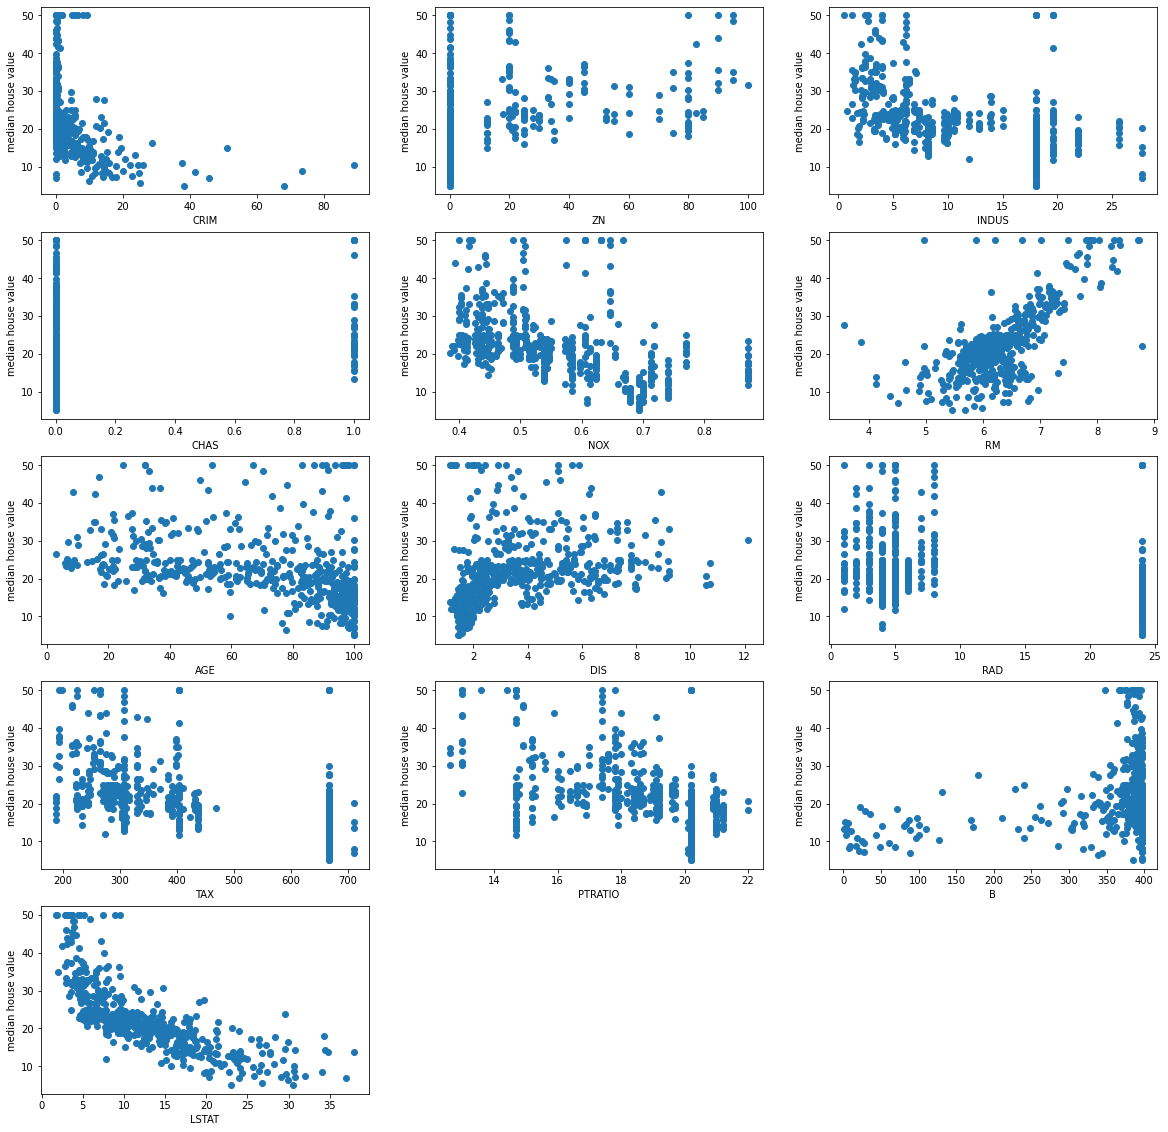

In [ ]:
plt.figure(figsize=(20,20))
counter=1

for col in features.columns:
  plt.subplot(5,3,counter)
  plt.scatter(features[col],target)
  plt.xlabel(col)
  plt.ylabel("median house value")
  counter+=1

From the above graph,we can see that the features have a linear relationship with the target
`

Lets scale our features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x= sc.fit_transform(features)
features_scaled = pd.DataFrame(x,columns = features.columns)

Now lets check if our features themselves are correlated

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["features"]=features_scaled.columns
vif["VIF"] = [variance_inflation_factor(features_scaled.values,i) for i in range(features_scaled.shape[1])]

In [ ]:
vif.sort_values(by="VIF",ascending=False)

,features,VIF
9,TAX,9.008554
8,RAD,7.484496
4,NOX,4.393720
2,INDUS,3.991596
7,DIS,3.955945
6,AGE,3.100826
12,LSTAT,2.941491
1,ZN,2.298758
5,RM,1.933744
10,PTRATIO,1.799084


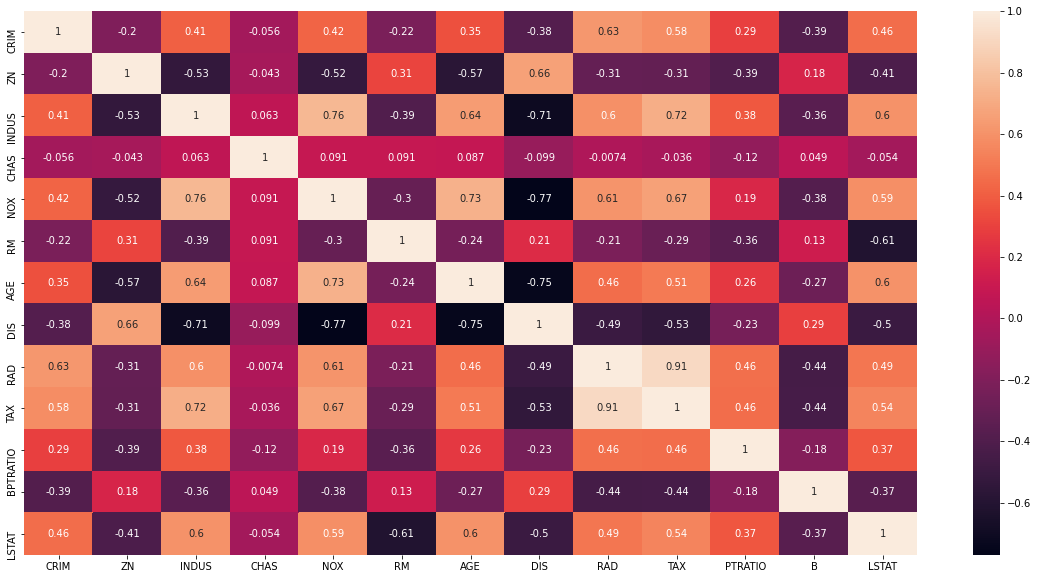

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(features.corr(),annot=True)

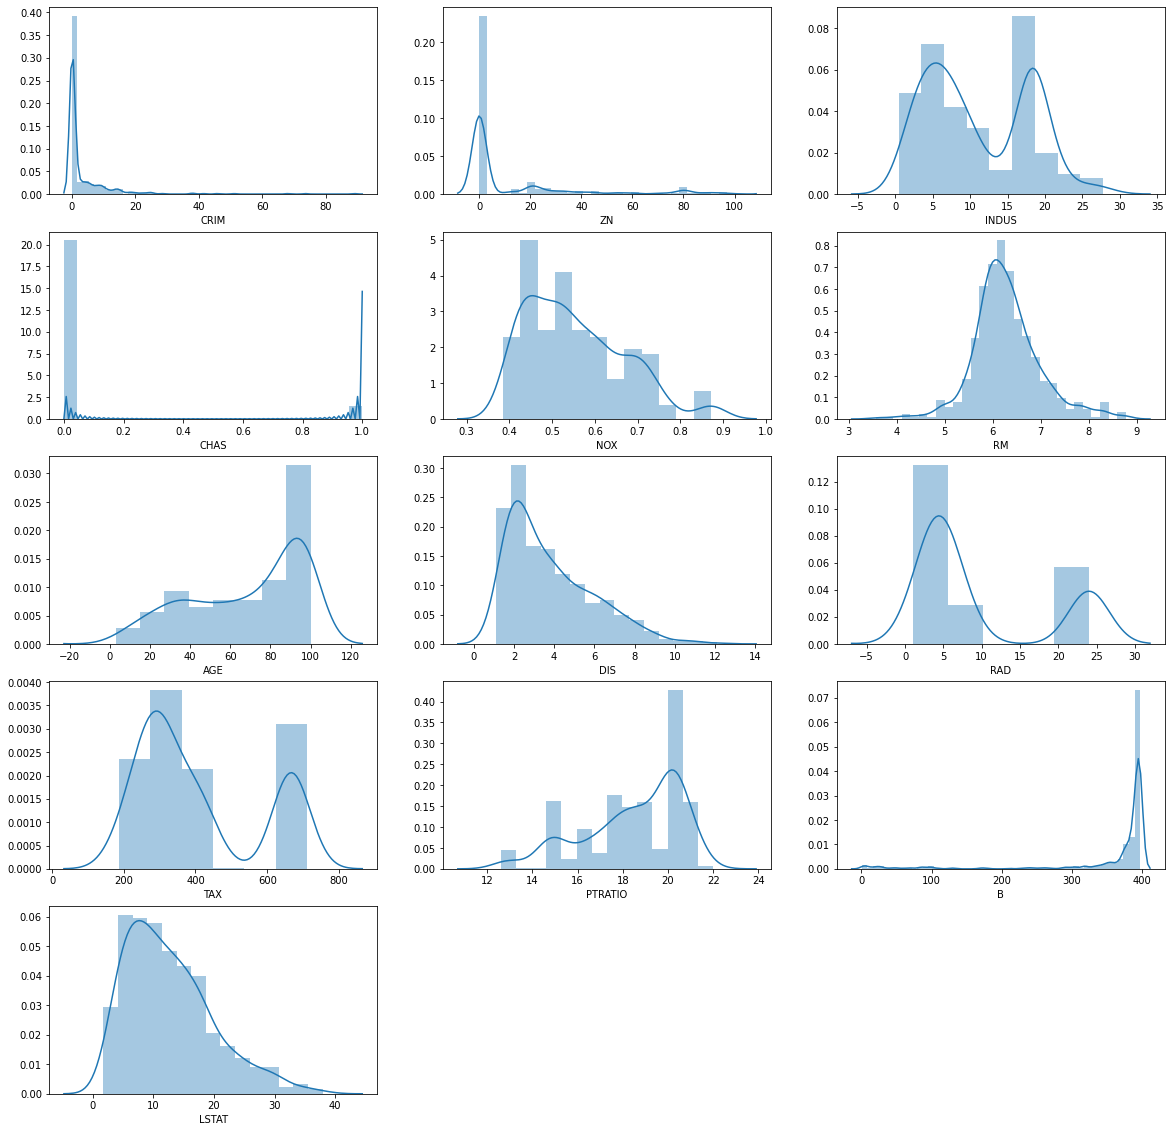

In [ ]:
plt.figure(figsize=(20,20))
counter=1

for col in features.columns:
  plt.subplot(5,3,counter)
  plt.xlabel(col)
  sns.distplot(features[col])
  counter+=1


From above graph we can see that some of the  columns have skeweness

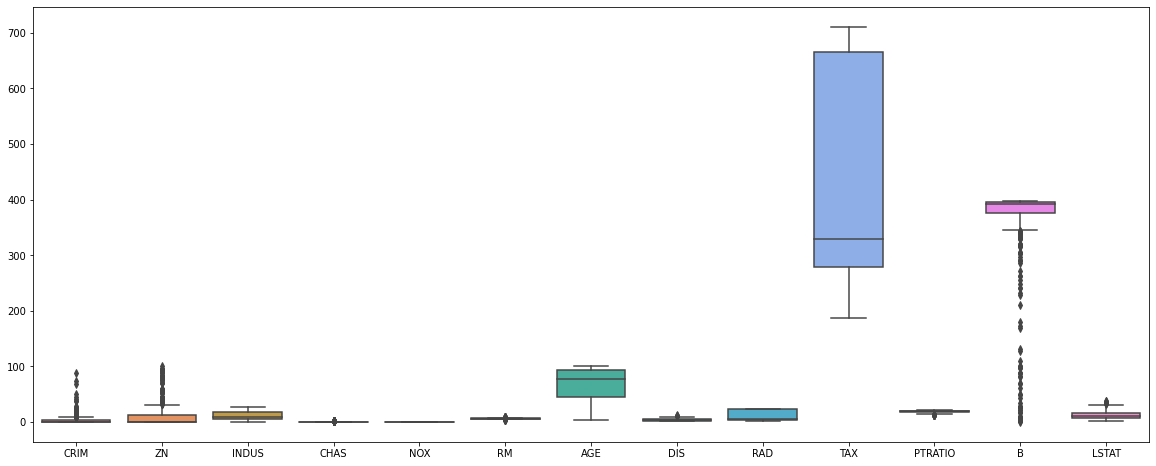

In [ ]:
plt.figure(figsize =(20,8))
sns.boxplot(data=features)

In [ ]:
features.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


We have analysed the data.Let us first apply linear regression without applying any feature engineering(to do -scaling,remove outliers,remove features with high vif)



**NO FEATURE ENGINEERING**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.7413935597999869

**NO FEATURE ENGINEERING ACCURACY - 0.741**


Lets make a method to generate the model so that we can reuse in the next steps


In [ ]:
def get_r2_score(features1,target1):
  X_train,X_test,y_train,y_test = train_test_split(features1,target1,test_size=0.2,random_state=45)
  lm = LinearRegression()
  #print(X_train.head())
  model = lm.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("r2_score : ",r2_score(y_test,y_pred))



In [ ]:
get_r2_score(features,target)

r2_score :  0.7413935597999869


**FEATURE ENGINEERING -SCALING**

In [ ]:
pipeline = Pipeline([('scaler',StandardScaler())])

In [ ]:
x = pipeline.fit_transform(features)

In [ ]:
features_scaled = pd.DataFrame(x,columns=features.columns)

In [ ]:
features_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
get_r2_score(features_scaled,target)

r2_score :  0.741393559799985


**FEATURE ENGINEERING -Removing features**

In [ ]:
vif.sort_values("VIF",ascending=False)

,features,VIF
9,TAX,9.008554
8,RAD,7.484496
4,NOX,4.393720
2,INDUS,3.991596
7,DIS,3.955945
6,AGE,3.100826
12,LSTAT,2.941491
1,ZN,2.298758
5,RM,1.933744
10,PTRATIO,1.799084


lets remove TAX column and check vif

In [ ]:
features_eng1 = features_scaled.drop("TAX",axis=1)

In [ ]:
vif = pd.DataFrame()
vif["features"]=features_eng1.columns
vif["VIF"] = [variance_inflation_factor(features_eng1.values,i) for i in range(features_eng1.shape[1])]

In [ ]:
vif.sort_values("VIF",ascending=False)

,features,VIF
4,NOX,4.369271
7,DIS,3.954446
2,INDUS,3.226015
6,AGE,3.098044
11,LSTAT,2.940800
8,RAD,2.837494
1,ZN,2.184240
5,RM,1.923075
0,CRIM,1.791940
9,PTRATIO,1.788839


In [ ]:
get_r2_score(features_eng1,target)

r2_score :  0.7351238418553409


As you can see our accuracy has dropped.So lets try dropping the rad column instead of tax

In [ ]:
features_eng1 = features_scaled.drop("RAD",axis=1)

In [ ]:
vif = pd.DataFrame()
vif["features"]=features_eng1.columns
vif["VIF"] = [variance_inflation_factor(features_eng1.values,i) for i in range(features_eng1.shape[1])]

In [ ]:
vif.sort_values("VIF",ascending=False)

,features,VIF
4,NOX,4.304929
7,DIS,3.954951
2,INDUS,3.682265
8,TAX,3.415289
6,AGE,3.083009
11,LSTAT,2.937752
1,ZN,2.273018
5,RM,1.885425
9,PTRATIO,1.734873
0,CRIM,1.664471


In [ ]:
get_r2_score(features_eng1,target)

r2_score :  0.731186201111417


**FEATURE ENGINEERING - REMOVE OUTLIERS**

In [ ]:
features_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


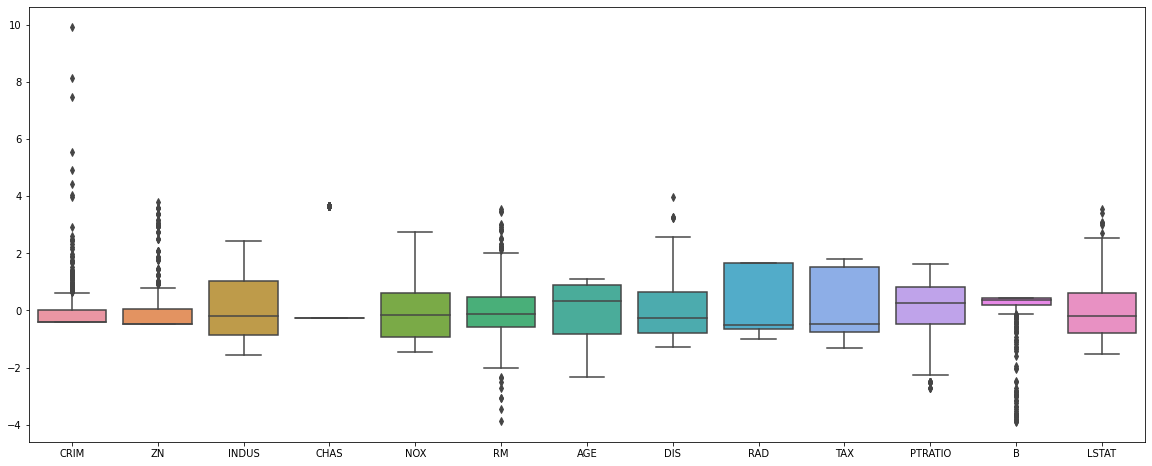

In [ ]:
plt.figure(figsize =(20,8))
sns.boxplot(data=features_scaled)

Lets combine features and target to remove outliers

In [ ]:
data = pd.concat([features,target],axis=1)

In [ ]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


My method of removing outliers

In [ ]:
data_new = data.copy()


In [ ]:
outlier_columns = ["CRIM","ZN","RM","DIS","PTRATIO","B","LSTAT"]

In [ ]:
for col in outlier_columns:
  iqr = data_new[col].quantile(0.75) - data[col].quantile(0.25)
  upper = data_new[col].quantile(0.75) + 1.5 *iqr
  lower = data_new[col].quantile(0.25) - 1.5 *iqr
  data_new = data_new[(data_new[col]<upper) & (data_new[col]>lower)]
  print(data_new.shape)


(440, 14)
(395, 14)
(373, 14)
(371, 14)
(362, 14)
(316, 14)
(306, 14)


Lets check accuracy

In [ ]:
features_eng2 = data_new.iloc[:,:-1]
target_eng2 = data_new.iloc[:,-1]

In [ ]:
get_r2_score(features_eng2,target_eng2)

r2_score :  0.48374834410313916


Our accuracy went so bad so fast...lol(maybe because the data got reduced a lot)


Lets remove outliers using a better method

Z SCORE METHOD

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from scipy import stats

In [ ]:
z = np.abs(stats.zscore(data))

In [ ]:
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [ ]:
np.where(z>3)

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466]),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [ ]:
z<3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

.all(axis=1) returns true if all the values in a paritcular row are less than 3

In [ ]:
data_new   = data[(z<3).all(axis=1)]

In [ ]:
data_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
data_new.shape

(415, 14)

In [ ]:
(data<3).all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

Lets check accuracy

In [ ]:
features_eng2 = data_new.iloc[:,:-1]
target_eng2 = data_new.iloc[:,-1]

In [ ]:
get_r2_score(features_eng2,target_eng2)

r2_score :  0.6969057967833667


As you can see above,we are getting a good r2 score when we remove outliers using z score

Lets try using  using iqr instead of r2 score

In [ ]:
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
q1 = data.quantile(0.25)
q2 = data.quantile(0.75)
iqr = q2-q1

In [ ]:
iqr

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64

In [ ]:
data < (q1 - 1.5 * iqr)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data < iqr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,True,False,True,False,False,False,False,False,True,True,False,False,True,False
1,True,True,True,False,False,False,False,False,True,True,False,False,True,False
2,True,True,True,False,False,False,False,False,True,True,False,False,True,False
3,True,True,True,False,False,False,True,False,True,True,False,False,True,False
4,True,True,True,False,False,False,False,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,False,False,False,False,True,True,True,False,False,True,False
502,True,True,True,False,False,False,False,True,True,True,False,False,True,False
503,True,True,True,False,False,False,False,True,True,True,False,False,True,False
504,True,True,True,False,False,False,False,True,True,True,False,False,True,False


In [ ]:
data_new = data[~((data < (q1 - 1.5 * iqr)) |(data > (q2 + 1.5 * iqr))).any(axis=1)]
data_new.shape


(268, 14)

In [ ]:
features_eng2 = data_new.iloc[:,:-1]
target_eng2 = data_new.iloc[:,-1]

In [ ]:
get_r2_score(features_eng2,target_eng2)

r2_score :  0.6532682729940299



*   r2_Score without removing outliers  - 0.74
*   r2_Score after removing outlier using zscore  - 0.69
*   r2_Score after removing outlier using iqr - 0.65


**As we have checked evrything,Lets implement our final model**

Final model includes:


1.   Remove TAX columen because of multicollinearity
2.   use zscore to remove the outliers
3.   Scaling using Standard Scaler
4.   Applying Linear Regression



In [ ]:
features = pd.DataFrame(boston.data,columns = boston.feature_names)
target = pd.DataFrame(boston.target,columns=["MEDV"])

In [ ]:
features.drop("TAX",axis=1,inplace=True)

In [ ]:
features.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33


In [ ]:
data=pd.concat([features,target],axis=1)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2


In [ ]:
z = np.abs(stats.zscore(data))

In [ ]:
data_final = data[(z<3).all(axis=1)]

In [ ]:
data_final.shape

(415, 13)

In [ ]:
sc = StandardScaler()

In [ ]:
data_scaled = sc.fit_transform(data_final)

In [ ]:
features_final = data.iloc[:,:-1]
target_final = data.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features_final,target_final,test_size=0.1,random_state=45)

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("r2_score : ",r2_score(y_test,y_pred))

r2_score :  0.6745854754378455


In [ ]:
filename = "finalized_model.pickle"

In [ ]:
import pickle
pickle.dump(model,open(filename,'wb'))

In [ ]:
x = [[0.00632,18.0	,2.31,	0.0,	0.538,	6.575,	65.2,	4.0900	,1.0	,15.3	,396.90,	4.98]]
x_scaled = sc.fit_transform(x)

In [ ]:
model.predict(x_scaled)

array([33.64857592])

As we can see,our model has overfit the data,so lets try lasso or ridege

In [ ]:
model.score(X_train,y_train)

0.741217755390615

In [ ]:
model.score(X_test,y_test)

0.6745854754378455

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasscv = LassoCV(alphas=None,cv=10)

In [ ]:
lasscv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lasscv.alpha_

0.2900343360995049

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lass  =Lasso(alpha=lasscv.alpha_)

In [ ]:
model = lass.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.6268297600975274

Lasso reg has decreased 